# 연습 

#### 패키지 불러오기

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter

C:\ProgramData\Anaconda3\Lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### 그래프 옵션 지정

In [2]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "Malgun Gothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 구성하기

#### 데이터 불러오기

In [3]:
df_raw = pd.read_csv("D:/WORK/DATA/HMEQ.CSV")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


####  교재에 없음:부연 설명-범주형 변수의 수준(level)별 빈도수 확인

In [5]:
# 범주형 변수 list 생성
#list_var_char = df_raw.select_dtypes(include='object').columns  # list가 아닌 변수 정보 추출

list_var_char = list(df_raw.select_dtypes(include='object').columns)
# list에서 특정값(변수) 제거:remove. 값 입력
#list_var_char.remove("JOB")
# list에서 특정값(변수) 제거:del. 값의 index 입력
#del list_var_char[0]

# list에서 특정값(변수) 추가:append. 값 입력
#list_var_char.append("BAD")
# list에서 특정값(변수) 추가:insert. index & 값 입력
list_var_char.insert(0,"BAD")

# list에 저장된 변수의 수준(level)별 빈도수 산출
for v_var in list_var_char:
    print("변수: ", v_var, "Level = ",Counter(df_raw[v_var]))


변수:  BAD Level =  Counter({0: 3403, 1: 345})
변수:  REASON Level =  Counter({'DebtCon': 2645, 'HomeImp': 1103})
변수:  JOB Level =  Counter({'Other': 1444, 'ProfExe': 929, 'Office': 623, 'Mgr': 477, 'Self': 130, nan: 81, 'Sales': 64})


### 데이터 전처리

1. 결측치 처리:모든 기법
2. 데이터 분리(목표변수 vs. 설명변수):모든 기계학습 기법. 회귀분석은 분리 불필요
3. 전처리 기준 
    * 목표변수:전처리 처리 대상 아님
    * 연속형 설명변수 scaling 적용:거리 기반 기법(SVM, NN, KNN, 군집분석, 주성분분석), 표준화 회귀계수(다중/로지스틱 회귀)
    * 범주형 설명변수 duumy 변환:모든 기계학습 기법(DT, RF, GB, SVM, NN, KNN). 단, 회귀분석은 "C(변수)"로 처리
4. 설명변수 결합
5. 데이터 분할(Train vs. Test):모든 기법. 모델의 일반화, 과적합 방지 목적

* 전처리 순서는 변경될 수 있음

#### 결측치 처리

In [6]:
# 변수별 결측치 현황 확인
print(df_raw.isnull().sum(axis = 0))

# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 df_ raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64


C:\Users\greeninsight\AppData\Local\Temp\ipykernel_23368\2761379102.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [7]:
# 결측치 처리 후 확인
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### 데이터 분리:목표변수/설명변수 분리

In [8]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw["BAD"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

#### 범주형 설명변수 더미변환

In [9]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


#### 연속형 설명변수 scaling 변환

In [10]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


#### 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형

In [11]:
display("원래 설명변수:", df_raw_x.head(3))

# 원래 연속형(df_raw_x_num) + dummy된 범주형(df_x_dummy)
df_x_raw_dummy = df_raw_x_num.join(df_x_dummy)
display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:",df_x_raw_dummy.head(3))

# scale된 연속형(df_x_scaled)+ dummy된 범주형(df_x_dummy)
df_x_scale_dummy = df_x_scaled.join(df_x_dummy)
display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:",df_x_scale_dummy.head(3))

# scale된 연속형(df_x_scaled) + 원래 범주형(df_raw_x_char)
df_x_scale_raw = df_x_scaled.join(df_raw_x_char)
display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_x_scale_raw.head(3))

'원래 설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503


'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,1,0,0,0,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office


#### 데이터 분할:Train vs. Test

In [12]:
# 원래 연속형+ Dummied 범주형...DT/RF/GB 용:df_x_raw_dummy
df_train_x_rd, df_test_x_rd, df_train_y, df_test_y = train_test_split(df_x_raw_dummy, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:", df_train_x_rd.head())

# 기계학습용 데이터(Scaled 연속형+ Dummied 범주형) 분할:df_x_scale_dummy 
df_train_x_sd, df_test_x_sd, df_train_y, df_test_y = train_test_split(df_x_scale_dummy, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:", df_train_x_sd.head())

# 회귀분석용(표준화 회귀계수) 데이터(Scaled 연속형+ 원래 범주형) 분할:df_x_scale_raw 
df_train_x_reg, df_test_x_reg, df_train_y, df_test_y = train_test_split(df_x_scale_raw, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_train_x_reg.head())

'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.0,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.0,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.0,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.0,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.0,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,0.711797,0.641635,0.442135,0.251809,-0.267462,-0.342558,-0.411081,-0.666629,0.769163,0.941249,1,0,0,1,0,0,0,0
3314,0.939812,0.130056,0.172648,1.329297,6.371258,-0.342558,-0.615350,-0.666629,3.803824,1.937929,1,0,0,0,0,1,0,0
93,-1.208794,-0.021075,-0.496536,-1.229736,-0.267462,-0.342558,-0.290706,-0.666629,0.664520,1.586982,1,0,0,0,0,1,0,0
1456,-0.401970,-1.178733,-1.386871,-0.286935,-0.267462,-0.342558,-1.093935,-0.666629,-0.591202,-1.494455,1,0,0,1,0,0,0,0
3327,0.966122,-0.392403,-0.068276,-0.825678,-0.267462,-0.342558,-0.178756,0.629077,0.245946,0.440027,1,0,0,1,0,0,0,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
3164,0.711797,0.641635,0.442135,0.251809,-0.267462,-0.342558,-0.411081,-0.666629,0.769163,0.941249,DebtCon,Office
3314,0.939812,0.130056,0.172648,1.329297,6.371258,-0.342558,-0.615350,-0.666629,3.803824,1.937929,DebtCon,ProfExe
93,-1.208794,-0.021075,-0.496536,-1.229736,-0.267462,-0.342558,-0.290706,-0.666629,0.664520,1.586982,DebtCon,ProfExe
1456,-0.401970,-1.178733,-1.386871,-0.286935,-0.267462,-0.342558,-1.093935,-0.666629,-0.591202,-1.494455,DebtCon,Office
3327,0.966122,-0.392403,-0.068276,-0.825678,-0.267462,-0.342558,-0.178756,0.629077,0.245946,0.440027,DebtCon,Office


## 최종 모델 실행

#### 평가 저장

In [13]:
# 분석 모델 리스트
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [14]:
model

['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

### @의사결정나무

In [15]:
# 최종모델
dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
dt_final.fit(df_train_x_rd, df_train_y)

# 정확도
train_accuracy.append(dt_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(dt_final.score(df_test_x_rd, df_test_y))

# 예측값
y_prob_1 = dt_final.predict_proba(df_test_x_rd)[:, 1]  # 1 발생 확률
y_pred = dt_final.predict(df_test_x_rd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[1002   19]
 [  69   35]]
              precision    recall  f1-score   support

           0      0.936     0.981     0.958      1021
           1      0.648     0.337     0.443       104

    accuracy                          0.922      1125
   macro avg      0.792     0.659     0.700      1125
weighted avg      0.909     0.922     0.910      1125



In [16]:
print("P(y=1) 확률...", y_prob_1)
print()
print("1/0-판정...",y_pred)

P(y=1) 확률... [0.03066813 0.09276438 0.3        ... 0.03066813 0.03066813 0.03066813]

1/0-판정... [0 0 0 ... 0 0 0]


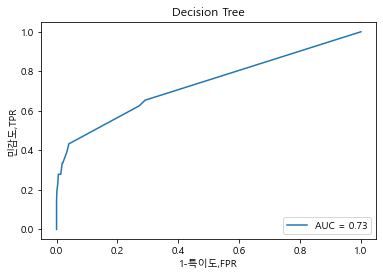

In [17]:
plt.title("Decision Tree")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

##### precision, recall, f1 score

In [18]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.44303797468354433]

### @랜덤 포레스트

In [19]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=20, max_depth=6, n_estimators=100, random_state=1234)
rf_final.fit(df_train_x_rd, df_train_y)

# 정확도
train_accuracy.append(rf_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(rf_final.score(df_test_x_rd, df_test_y))

# 예측값
y_prob_1 = rf_final.predict_proba(df_test_x_rd)[:, 1]  # 1 발생 확률
y_pred = rf_final.predict(df_test_x_rd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[1021    0]
 [  84   20]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



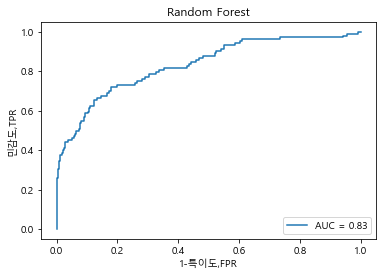

In [20]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

##### precision, recall, f1 score

In [21]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.44303797468354433, 0.32258064516129037]

#### 그래디언트 부스팅

In [22]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100,
			 learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x_rd, df_train_y)

# 정확도
train_accuracy.append(gb_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(gb_final.score(df_test_x_rd, df_test_y))

# 예측값
y_prob_1 = gb_final.predict_proba(df_test_x_rd)[:, 1]  # 1 발생 확률
y_pred = gb_final.predict(df_test_x_rd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[1020    1]
 [  56   48]] 

              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



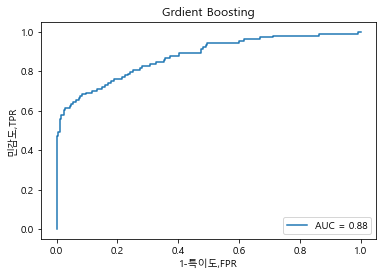

In [23]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

##### precision, recall, f1 score

In [24]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.44303797468354433, 0.32258064516129037, 0.627450980392157]

### 인공신경망
    * df_train_x_sd/df_test_x_sd (Scaled 연속형+ Dummied 범주형) 사용 

In [25]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(80, 80), activation="relu", solver="adam", random_state = 1234)
nn_final.fit(df_train_x_sd, df_train_y)

# 정확도
train_accuracy.append(nn_final.score(df_train_x_sd, df_train_y))
test_accuracy.append(nn_final.score(df_test_x_sd, df_test_y))

# 예측값
y_prob_1 = nn_final.predict_proba(df_test_x_sd)[:, 1]  # 1 발생 확률
y_pred = nn_final.predict(df_test_x_sd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[1018    3]
 [  48   56]] 

              precision    recall  f1-score   support

           0      0.955     0.997     0.976      1021
           1      0.949     0.538     0.687       104

    accuracy                          0.955      1125
   macro avg      0.952     0.768     0.831      1125
weighted avg      0.954     0.955     0.949      1125



C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


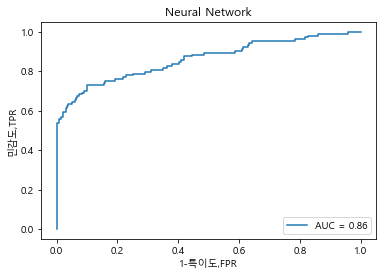

In [26]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

##### precision, recall, f1 score

In [27]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.44303797468354433,
 0.32258064516129037,
 0.627450980392157,
 0.6871165644171779]

## 모델별 정확도 산출 및 평가

#### # 모델별 평가 결과

In [28]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.934,0.922,0.734,0.648,0.337,0.443
RandomForest,0.927,0.925,0.832,1.000,0.192,0.323
GradientBoosting,0.991,0.949,0.875,0.980,0.462,0.627
NeuralNet,1.000,0.955,0.861,0.949,0.538,0.687


#### # 모델별 평가 지표 확인

In [29]:
df_eval.T

,DecisionTree,RandomForest,GradientBoosting,NeuralNet
TrainAccuracy,0.934045,0.926801,0.990850,1.000000
TestAccuracy,0.921778,0.925333,0.949333,0.954667
AUC,0.734221,0.831538,0.875367,0.861005
Precision,0.648148,1.000000,0.979592,0.949153
Recall,0.336538,0.192308,0.461538,0.538462
F1Score,0.443038,0.322581,0.627451,0.687117


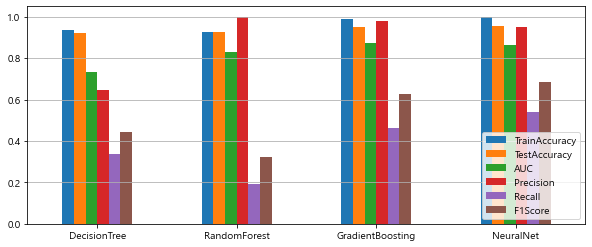

In [33]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right"); plt.grid(axis = "y")

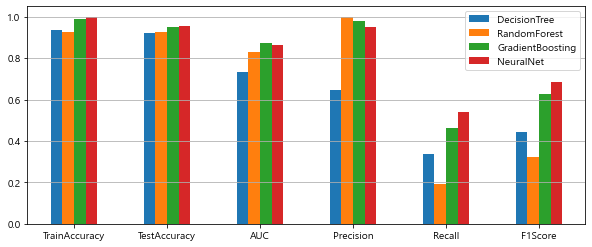

In [30]:
# Data 전치하여 지표 기준으로 모델 성능 평가 
df_eval.T.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="upper right"); plt.grid(axis = "y")

* 인공 신경망 모델이 가장 높은 정확도와 F1 score, AUC를 보임
* NeuralNet > GradientBoosting > DecisionTree > RandomForest

## End of 모델평가